In [66]:
import numpy as np
import pandas as pd

In [67]:
classes = pd.read_csv('classes.txt',delim_whitespace=True,names=['id','animal'])

In [68]:
animal_features = open('predicate-matrix-continuous.txt', 'r')

In [69]:
a = animal_features.readlines()

In [70]:
b = []
for i in range(len(a)):
    b.append(list(np.array(np.matrix(a[i]))[0]))

In [71]:
animals_matrix = np.matrix(b)

In [72]:
cov_matrix = np.cov(animals_matrix, rowvar=False)

In [73]:
eigen_values = np.linalg.eigh(cov_matrix)[0]
eigen_vectors = np.linalg.eigh(cov_matrix)[1]

# Taking 2 Principle components with highest variance and second highest variance

In [74]:
PCA_1_eigen_value = eigen_values[84]
PCA_1_eigen_vector = eigen_vectors[:,84]

PCA_2_eigen_value = eigen_values[83]
PCA_2_eigen_vector = eigen_vectors[:,83]

# Now we have animal_matrix of 50x85 with 85 dimension. We have to project this 85 dimension 50 vectors onto PCA1 and PCA2. 
# Projection is nothing but the dot product between the vector and the unit vector of the direction onto which the vector needs to projected

In [75]:
animals_matrix_2d = animals_matrix.dot(eigen_vectors[:,83:85])

In [76]:
animals_matrix_2d.shape

(50, 2)

In [77]:
from matplotlib import pyplot as plt

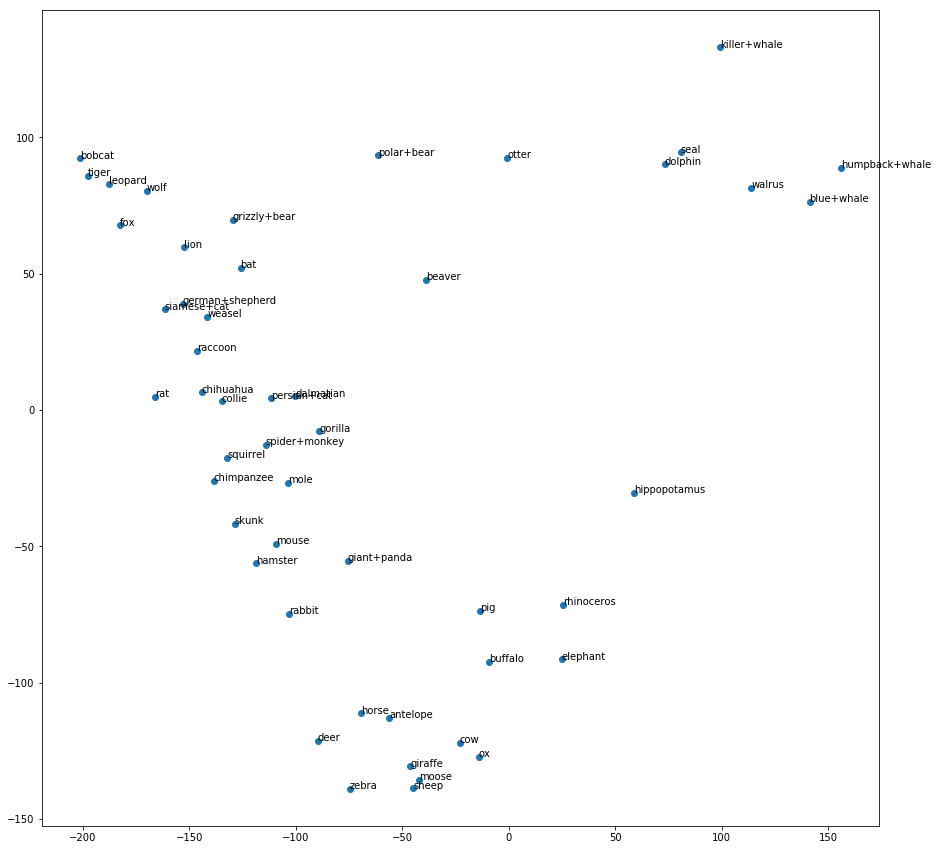

In [78]:
x = []
for i in list(np.array(animals_matrix_2d[:,1])):
    x.append(i[0])

y = []
for i in list(np.array(animals_matrix_2d[:,0])):
    y.append(i[0])
    
plt.figure(figsize=(15, 15))
plt.scatter(x,y)
for i, txt in enumerate(list(classes['animal'])):
                        plt.annotate(txt, (x[i],y[i]))
plt.show()